In [ ]:
""" this file makes heatmap of scimilarity vs yang's annotation"""

In [1]:
""" environment """
import scanpy as sc
import warnings
import utils_AT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
""" variables """
# need to be Yang's cluster
# cluster1 = 'High plasticity'
# cluster2 = 'Endoderm-like'
# 
# # need to be scimilarity cluster
# common_cluster = 'epithelial cell'

cluster1 = 'T cell'
cluster2 = 'B cell'

# need to be scimilarity cluster
common_cluster = ''

title_avg_antn = 'Distribution of Average Percentage '
title_STD = 'Distribution of STD '

In [3]:
""" input-> series data of cells and cluster name, 
output-> frequency matrix of the cell cluster """
def make_frequency_matrix(celltype_hits_series):
    # Initialize an empty DataFrame
    frequency_df = pd.DataFrame()
    
    # Iterate through each row and update the DataFrame
    for idx, celltype_str in celltype_hits_series.items():
        celltype_dict = json.loads(celltype_str)
        
        for cell, freq in celltype_dict.items():
            if cell not in frequency_df.columns:
                frequency_df[cell] = 0
            frequency_df.at[idx, cell] = int(freq)
    
    # Fill NaN values with 0
    frequency_df = frequency_df.fillna(0)
    return frequency_df

In [4]:
""" function: input-> frequency matrix, output-> statistical output: avg, std, %"""
def make_summary_df(frequency_df):
    column_averages = frequency_df.mean()
    column_std = frequency_df.std()
    summary_df = pd.DataFrame({
        'Average': column_averages,
        'STD': column_std
    })
    summary_df['Average Percentage (%)'] = (summary_df['Average'] / summary_df['Average'].sum()) * 100
    sorted_summary_df = summary_df.sort_values(by=['Average Percentage (%)'], ascending=False) 
    return sorted_summary_df

In [6]:
""" read data """
# data_path = '../data/KPTracer-Data/expression/adata_processed_comp_SCANTN.h5ad' #(AT)
data_path = '../data/MSK_tumor_data/adata_combined_mnnc_010920_SCANTN2.h5ad'
adams_comp = sc.read(data_path)

In [22]:
""" takes two cell clusters and make frequency matrix """

# cluster 1


# uncomment this line
#common_cluster = adams1.obs['celltype_hint'][9]
# adams = adams1[adams1.obs['celltype_hint'].isin([common_cluster])]
adams = adams_comp[adams_comp.obs['cell_type_med'].isin([cluster1])]
celltype_hits_series1 = adams.obs['celltype_hits']
frequency_df1 = make_frequency_matrix(celltype_hits_series1)

# cluster 2
# adams1 = adams_comp[adams_comp.obs['Cluster-Name'].isin([cluster2])]
# adams = adams1[adams1.obs['celltype_hint'].isin([common_cluster])]
adams = adams_comp[adams_comp.obs['cell_type_med'].isin([cluster2])]
celltype_hits_series2 = adams.obs['celltype_hits']
frequency_df2 = make_frequency_matrix(celltype_hits_series2)

print()

In [23]:
""" make statistics """
summary_df1 = make_summary_df(frequency_df1)
summary_df2 = make_summary_df(frequency_df2)

In [24]:
""" to reduce crowd in the statistical visualization, take annotations till top 98%"""
# Compute the cumulative sum
summary_df1['Cumulative Percentage'] = summary_df1['Average Percentage (%)'].cumsum()
filtered_df1 = summary_df1
# columns_to_plot = summary_df1[summary_df1['Cumulative Percentage'] <= 97].index
# filtered_df1 = summary_df1.loc[columns_to_plot]

summary_df2['Cumulative Percentage'] = summary_df2['Average Percentage (%)'].cumsum()
filtered_df2 = summary_df2
# columns_to_plot = summary_df2[summary_df2['Cumulative Percentage'] <= 97].index
# filtered_df2 = summary_df2.loc[columns_to_plot]

print()


The name of the third cluster is: T cell


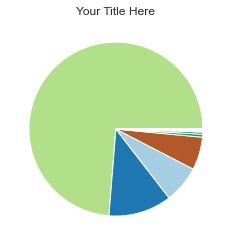

In [39]:
#fig, ax = plt.subplots(2, 2, figsize=(15, 7))


# Step 1: Gather all unique clusters from both dataframes
all_clusters = set(filtered_df1.index).union(set(filtered_df2.index))

# Step 2: Map each unique cluster to a specific color
colors = plt.cm.Paired(range(len(all_clusters)))
color_map = {cluster: color for cluster, color in zip(all_clusters, colors)}

color_map_keys = list(color_map.keys())

# Access the third key (name of the third entry) in the color_map
# Index 2 is used because list indexing starts at 0
if len(color_map_keys) >= 3:
    third_cluster_name = color_map_keys[2]
    print(f"The name of the third cluster is: {third_cluster_name}")
else:
    print("The color map does not have three entries.")

# if 'CD8-positive, alpha-beta cytotoxic T cell' in color_map and 'B cell' in color_map:
#     color_map['CD8-positive, alpha-beta cytotoxic T cell'] = color_map['B cell']
if 'natural killer cell' in color_map and 'native cell' in color_map:
    color_map['natural killer cell'] = '#1f77b4'


# Identify the majority cluster in filtered_df1
majority_cluster = filtered_df2['Average Percentage (%)'].idxmax()

# Set the color for the majority cluster to orange
color_map[majority_cluster] = '#2ba02d'

# Generate colors for each cluster in filtered_df1 using the updated color_map
cluster_colors1 = [color_map[cluster] for cluster in filtered_df1.index]

# Labels with percentages
labels_with_percentages = [f"{label} ({size:.1f}%)" for label, size in zip(filtered_df1.index, filtered_df1['Average Percentage (%)'])]

# Plotting the pie chart (assuming ax is part of a subplot grid)
fig, ax = plt.subplots()
ax.pie(filtered_df1['Average Percentage (%)'],  colors=cluster_colors1)
ax.set_title("Your Title Here")
plt.savefig(('figures/'+utils_AT.create_image_name('annotation_dist_', format='.jpg')), bbox_inches='tight', dpi=500)
plt.show()







# #create common colors for same annotations
# 
# # Step 1: Create a unified list of unique clusters
# all_clusters = set(filtered_df1.index).union(set(filtered_df2.index))
# # Step 2: Map each unique cluster to a specific color
# colors = plt.cm.Paired(range(len(all_clusters)))
# color_map = {cluster: color for cluster, color in zip(all_clusters, colors)}
# 
# 
# cluster_colors1 = [color_map[cluster] for cluster in filtered_df1.index]
# labels_with_percentages = [f"{label} ({size:.1f}%)" for label, size in zip(filtered_df1.index, filtered_df1['Average Percentage (%)'])]
# 
# ax[0, 0].pie(filtered_df1['Average Percentage (%)'], colors=cluster_colors1)
# ax[0, 0].set_title(title_avg_antn+cluster1)
# 
# labels_with_percentages = [f"{label} ({size:.1f})" for label, size in zip(filtered_df1.index, filtered_df1['STD'])]
# ax[0, 1].pie(filtered_df1['STD'])
# ax[0, 1].set_title(title_STD+cluster1)
# 
# 
# cluster_colors2 = [color_map[cluster] for cluster in filtered_df2.index]
# labels_with_percentages = [f"{label} ({size:.1f}%)" for label, size in zip(filtered_df2.index, filtered_df2['Average Percentage (%)'])]
# ax[1, 0].pie(filtered_df2['Average Percentage (%)'])
# ax[1, 0].set_title(title_avg_antn+cluster2)
# 
# labels_with_percentages = [f"{label} ({size:.1f})" for label, size in zip(filtered_df2.index, filtered_df2['STD'])]
# ax[1, 1].pie(filtered_df2['STD'])
# ax[1, 1].set_title(title_STD+cluster2)
# 
# plt.savefig(('figures/'+utils_AT.create_image_name('annotation_dist_', format='.jpg')), bbox_inches='tight', dpi=150)
# plt.show()
# plt.savefig('pie_chart.jpg')
# print()
# # ax[0, 0].pie(filtered_df1['Average Percentage (%)'], labels=filtered_df1.index, colors=cluster_colors1,autopct='%1.1f%%')


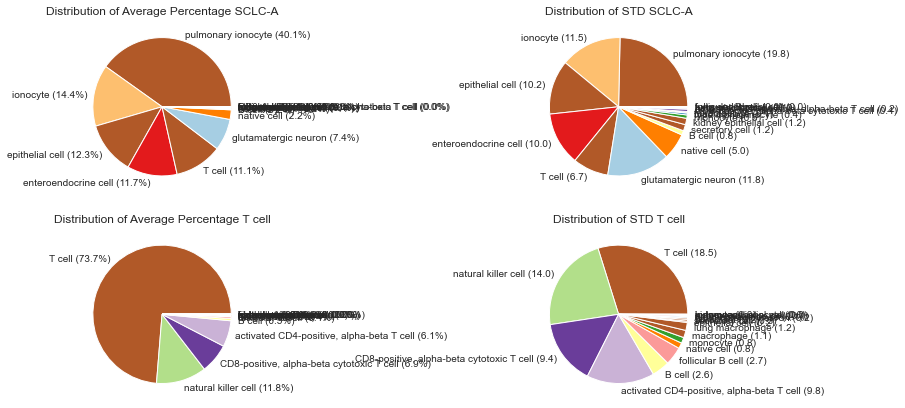

In [11]:
""" pi-chart of cluster % """
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

#create common colors for same annotations

# Step 1: Create a unified list of unique clusters
all_clusters = set(filtered_df1.index).union(set(filtered_df2.index))
# Step 2: Map each unique cluster to a specific color
colors = plt.cm.Paired(range(len(all_clusters)))
color_map = {cluster: color for cluster, color in zip(all_clusters, colors)}


cluster_colors1 = [color_map[cluster] for cluster in filtered_df1.index]
labels_with_percentages = [f"{label} ({size:.1f}%)" for label, size in zip(filtered_df1.index, filtered_df1['Average Percentage (%)'])]
ax[0, 0].pie(filtered_df1['Average Percentage (%)'], labels=labels_with_percentages, colors=cluster_colors1)
ax[0, 0].set_title(title_avg_antn+cluster1)

labels_with_percentages = [f"{label} ({size:.1f})" for label, size in zip(filtered_df1.index, filtered_df1['STD'])]
ax[0, 1].pie(filtered_df1['STD'], labels=labels_with_percentages, colors=cluster_colors1)
ax[0, 1].set_title(title_STD+cluster1)


cluster_colors2 = [color_map[cluster] for cluster in filtered_df2.index]
labels_with_percentages = [f"{label} ({size:.1f}%)" for label, size in zip(filtered_df2.index, filtered_df2['Average Percentage (%)'])]
ax[1, 0].pie(filtered_df2['Average Percentage (%)'], labels=labels_with_percentages, colors=cluster_colors2)
ax[1, 0].set_title(title_avg_antn+cluster2)

labels_with_percentages = [f"{label} ({size:.1f})" for label, size in zip(filtered_df2.index, filtered_df2['STD'])]
ax[1, 1].pie(filtered_df2['STD'], labels=labels_with_percentages, colors=cluster_colors2)
ax[1, 1].set_title(title_STD+cluster2)

plt.savefig(('figures/'+utils_AT.create_image_name('annotation_dist_', format='.jpg')), bbox_inches='tight', dpi=150)
plt.show()
print()
# ax[0, 0].pie(filtered_df1['Average Percentage (%)'], labels=filtered_df1.index, colors=cluster_colors1,autopct='%1.1f%%')


In [ ]:
""" THE BELOW CELLS ARE REDUNDANT, BUT SHOWS THE PERCENTAGE OF YANG VS SCIMILARITY ANNOATION """

In [ ]:
""" bar plot of cluster % """
import seaborn as sns

#sns.barplot(x=filtered_df1.index, y=filtered_df1['Average Percentage (%)'])
# plt.xticks(rotation=90)
# plt.title('Average (%) Values for Each Column')
# plt.ylabel('Average (%)')
# plt.show()
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

#create common colors for same annotations

# Step 1: Create a unified list of unique clusters
all_clusters = set(filtered_df1.index).union(set(filtered_df2.index))
# Step 2: Map each unique cluster to a specific color
colors = plt.cm.Paired(range(len(all_clusters)))
color_map = {cluster: color for cluster, color in zip(all_clusters, colors)}


# # Pie chart for 'Average Percentage (%)'
cluster_colors1 = [color_map[cluster] for cluster in filtered_df1.index]
ax[0, 0].bar(height = filtered_df2['Average Percentage (%)'], x=filtered_df2.index, color=cluster_colors1)
ax[0, 0].set_title(title_avg_antn+cluster1)
ax[0, 0].set_xticklabels(filtered_df2.index, rotation=45)

# cluster_colors2 = [color_map[cluster] for cluster in filtered_df2.index]
# ax[1, 0].pie(filtered_df2['Average Percentage (%)'], labels=filtered_df2.index, colors=cluster_colors2, autopct='%1.1f%%')
# ax[1, 0].set_title(title_avg_antn+cluster2)
# 
# ax[0, 1].pie(filtered_df1['STD'], labels=filtered_df1.index, colors=cluster_colors1,autopct='%1.1f%%')
# ax[0, 1].set_title(title_STD+cluster1)
# 
# 
# cluster_colors2 = [color_map[cluster] for cluster in filtered_df2.index]
# ax[1, 1].pie(filtered_df2['STD'], labels=filtered_df2.index, colors=cluster_colors2, autopct='%1.1f%%')
# ax[1, 1].set_title(title_STD+cluster2)
# 
# plt.savefig(('figures/'+utils_AT.create_image_name('annotation_dist_', format='.jpg')), bbox_inches='tight', dpi=150)
plt.show()

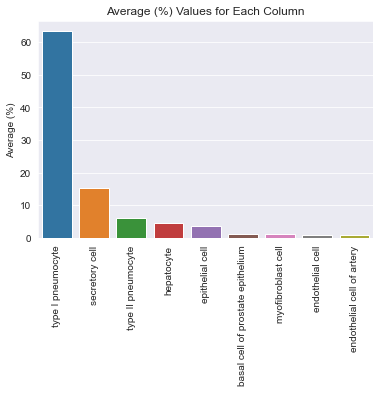

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=filtered_df1.index, y=filtered_df1['Average Percentage (%)'])
plt.xticks(rotation=90)
plt.title('Average (%) Values for Each Column')
plt.ylabel('Average (%)')
plt.show()

In [46]:
print()
import json
# Sample data (replace this with your actual data)
# Assuming adams_comp.obs['celltype_hits'] is a pandas Series
celltype_hits_series = adams_comp.obs['High plasticity']

# Parse each JSON string to a dictionary
celltype_dicts = celltype_hits_series.apply(json.loads)

# Convert the list of dictionaries to a DataFrame
frequency_df = pd.DataFrame(celltype_dicts.tolist())

# Fill NaN values with 0 to get the frequency matrix
frequency_df = frequency_df.fillna(0)

print(frequency_df)

KeyError: 'High plasticity'

In [5]:
column1_data = adams_comp.obs['Cluster-Name']
column2_data = adams_comp.obs['celltype_hint']

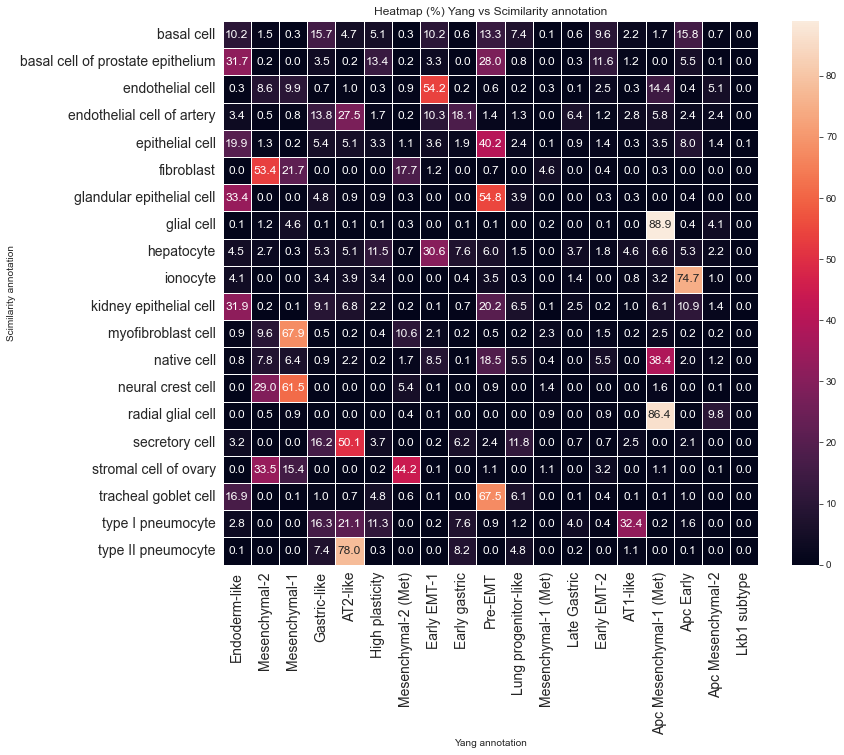

In [27]:
# Create a frequency matrix
frequency_matrix = pd.crosstab(column2_data, column1_data)

# Create a custom annotation matrix where all values are displayed as strings
#annotation_matrix = frequency_matrix.astype(str)
annotation_matrix = ((frequency_matrix.div(frequency_matrix.sum(axis=1), axis=0) * 100).round(1)).astype(str)
percentage_matrix = (frequency_matrix.div(frequency_matrix.sum(axis=1), axis=0) * 100).round(2)


# Create a heatmap using seaborn
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5, cbar=False)
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=annotation_matrix, fmt="", linewidths=0.5, cbar=False)
plt.figure(figsize=(12, 10))
sns.heatmap(percentage_matrix,  annot=annotation_matrix, fmt="s", linewidths=0.5,  annot_kws={"size": 12})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Yang annotation')
plt.ylabel('Scimilarity annotation')

plt.title('Heatmap (scimilarity %) Yang vs Scimilarity annotation')
plt.savefig('heatmap.jpg', bbox_inches='tight', dpi=150)
plt.show()

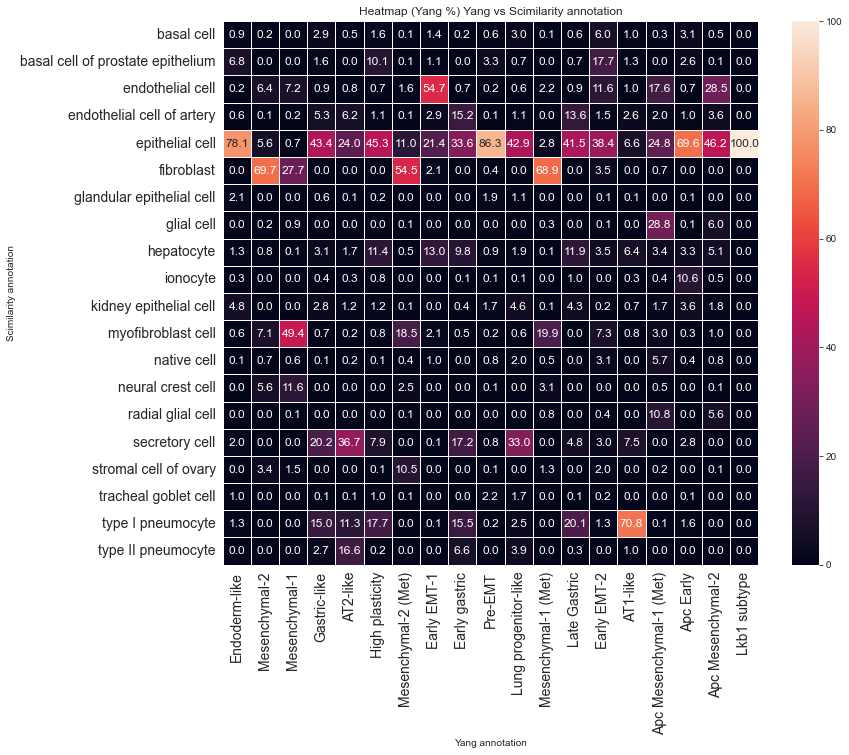

In [28]:
# Create a frequency matrix
frequency_matrix = pd.crosstab(column2_data, column1_data)

# Create a custom annotation matrix where all values are displayed as strings
#annotation_matrix = frequency_matrix.astype(str)
annotation_matrix = ((frequency_matrix.div(frequency_matrix.sum(axis=0), axis=1) * 100).round(1)).astype(str)
percentage_matrix = (frequency_matrix.div(frequency_matrix.sum(axis=0), axis=1) * 100).round(2)


# Create a heatmap using seaborn
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5, cbar=False)
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=annotation_matrix, fmt="", linewidths=0.5, cbar=False)
plt.figure(figsize=(12, 10))
sns.heatmap(percentage_matrix,  annot=annotation_matrix, fmt="s", linewidths=0.5,  annot_kws={"size": 12})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Yang annotation')
plt.ylabel('Scimilarity annotation')

plt.title('Heatmap (Yang %) Yang vs Scimilarity annotation')
plt.savefig('heatmap_2.jpg', bbox_inches='tight', dpi=150)
plt.show()